In [25]:
%cd .. 
%pwd
%matplotlib inline 

/home/ubuntu/nbs


In [2]:
import os, sys 
currentDir = os.getcwd() 
HOME_DIR = currentDir
DATA_DIR = currentDir + '/data/dogscats'
print HOME_DIR
print DATA_DIR


/home/ubuntu/nbs
/home/ubuntu/nbs/data/dogscats


In [3]:
sys.path.append(os.path.join(os.getcwd(), "orig" ))

from utils import * 
from vgg16 import Vgg16 
%matplotlib inline



WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
Using Theano backend.


1. Create validation and test sets from original set (there are a bunch of moving images that you can use 
2. Download weights 
3. Finetune weights 
4. Generate predictions 
5. Validate predictions 
6. Submit everything to Kaggle 



In [4]:
%cd $DATA_DIR

#Set path to sample/ path if desired
path = DATA_DIR + '/sample/' #'/sample/'
test_path = DATA_DIR + '/test/' #We use all the test data
results_path=DATA_DIR + '/results/'
train_path=path + '/train/'
valid_path=path + '/valid/'

vgg = Vgg16() 
print path
print test_path
print results_path
print train_path 
print valid_path

/home/ubuntu/nbs/data/dogscats
/home/ubuntu/nbs/data/dogscats/sample/
/home/ubuntu/nbs/data/dogscats/test/
/home/ubuntu/nbs/data/dogscats/results/
/home/ubuntu/nbs/data/dogscats/sample//train/
/home/ubuntu/nbs/data/dogscats/sample//valid/


In [5]:
batch_size=64 
numEpochs=3


In [6]:
batches=vgg.get_batches(train_path, batch_size=batch_size)
valid_batches = vgg.get_batches(valid_path, batch_size=batch_size)
vgg.finetune(batches)
print vgg.classes

# set the learning rate 
# the optimizer is what runs gradient descent and 
vgg.model.optimizer.lr = 0.01

Found 16 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
['cats', 'dogs']


In [7]:
lastEpochFileName = None 
for epoch in range(numEpochs): 
    print "Running epoch: %d" % epoch 
    vgg.fit(batches, valid_batches, nb_epoch=1)
    lastEpochFileName = 'ft%d.h5' % epoch 
    vgg.model.save_weights(results_path + lastEpochFileName)

print "Complete %s fit operations " % epoch 

    


Running epoch: 0
Epoch 1/1
16/16 [==============================] - 1s - loss: 0.9032 - acc: 0.6250 - val_loss: 0.0467 - val_acc: 0.9375
Running epoch: 1
Epoch 1/1
16/16 [==============================] - 1s - loss: 3.4571e-06 - acc: 1.0000 - val_loss: 0.0216 - val_acc: 1.0000
Running epoch: 2
Epoch 1/1
16/16 [==============================] - 1s - loss: 1.9856e-06 - acc: 1.0000 - val_loss: 0.0131 - val_acc: 1.0000
Complete 2 fit operations 


## Generate Predictions

After you have the validation and trainin set and training for 3 epochs, then you'll have to then now test it '

In [8]:
# do the prediction 
# use gen.flow_from_directory using shuffle=False, batch_size=8, class_mode=None
# 
batches, pred = vgg.test(test_path, batch_size=batch_size*2)



Found 12500 images belonging to 1 classes.


In [34]:
print batches.filenames[:5]
print batches.classes[:5]
print pred[:5]

['unknown/9292.jpg', 'unknown/12026.jpg', 'unknown/9688.jpg', 'unknown/4392.jpg', 'unknown/779.jpg']
[0 0 0 0 0]
[[  1.0000e+00   6.1603e-20]
 [  9.9993e-01   7.3575e-05]
 [  1.0000e+00   5.1911e-07]
 [  1.0000e+00   4.0298e-22]
 [  7.5494e-14   1.0000e+00]]


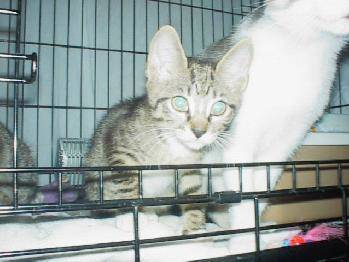

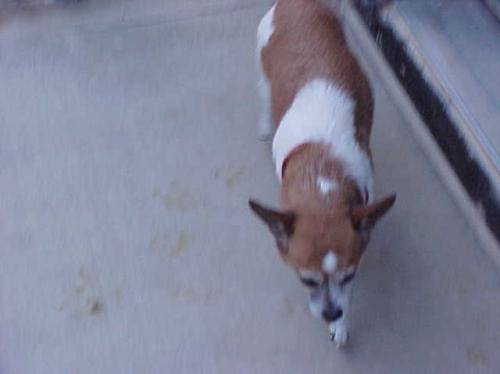

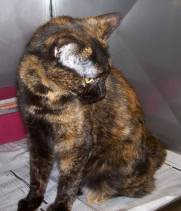

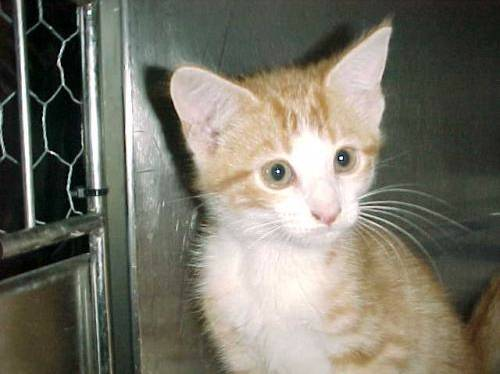

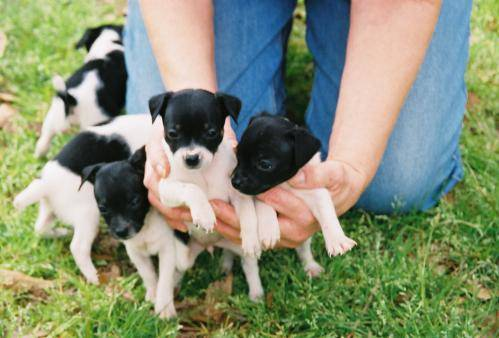

In [38]:
from IPython.display import Image
from IPython.display import display
a = Image(filename=test_path + batches.filenames[0]) 
b = Image(filename=test_path + batches.filenames[1])
c = Image(filename=test_path + batches.filenames[2]) 
d = Image(filename=test_path + batches.filenames[3]) 
e = Image(filename=test_path + batches.filenames[4]) 
display(a, b, c, d, e)




In [28]:
save_array(results_path + "test_pred", pred)
save_array(results_path + "filenames.dat", batches.filenames)

## Verify predictions

1. Do the fit/predic cycle for vaidation set. Get 
2. Get predictions in log prob form 
3. Convert to rounded up to classes 
4. Compare against classes already in validation directory 



In [39]:
# load using training set models 
vgg.model.load_weights(results_path + lastEpochFileName) 
val_batches, val_predictions = vgg.test(valid_path, batch_size=batch_size)



Found 16 images belonging to 2 classes.


In [46]:
filenames = val_batches.filenames
expected_classes =  val_batches.classes # dogs and cats labels with 0 and 1. This is taken from the directory directly 

print val_predictions # these predictions are low decimals 

sliced_predictions = val_predictions[:,0] # sliced with only column 0 
rounded_predictions = np.round(1-our_predictions)


[[  1.0000e+00   6.7450e-15]
 [  1.0000e+00   2.3824e-07]
 [  1.0000e+00   1.5766e-20]
 [  8.1068e-01   1.8932e-01]
 [  1.0000e+00   1.8263e-11]
 [  1.0000e+00   1.1117e-13]
 [  9.9998e-01   1.8975e-05]
 [  1.0000e+00   9.7598e-12]
 [  4.4597e-14   1.0000e+00]
 [  8.3073e-11   1.0000e+00]
 [  5.0512e-16   1.0000e+00]
 [  1.7707e-10   1.0000e+00]
 [  1.4979e-12   1.0000e+00]
 [  5.4229e-16   1.0000e+00]
 [  5.3297e-14   1.0000e+00]
 [  3.2570e-07   1.0000e+00]]


In [47]:
from keras.preprocessing import image 

def plots_idx(idx, titles=None): 
    plots([image.load_img(valid_path+ filenames[i]) for i in idx], titles=titles)
    
num_imgs_to_view = 4 

    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Found 16 correct labels: 


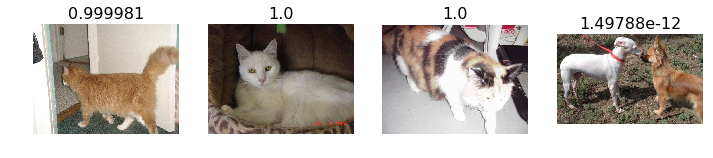

In [52]:
# view images at random 
correct = np.where(our_labels==expected_classes)[0] # return array correct [ 0  1  2  3  4 5] ex. [0] necessary 
print "Found %d correct labels: " % len(correct)
idx = permutation(correct)[:num_imgs_to_view]
plots_idx(idx, our_predictions[idx])


In [53]:
#2. A few incorrect labels at random
